In [94]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
df = pd.read_csv("asthma_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,NaN,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,NaN,159


In [66]:
df.shape

(300, 7)

In [68]:
df.describe()

,Patient_ID,Age,Peak_Flow
count,300.000000,300.000000,300.000000
mean,150.500000,39.666667,278.943333
std,86.746758,14.059675,72.861027
min,1.000000,18.000000,150.000000
25%,75.750000,27.000000,216.500000
50%,150.500000,39.000000,279.000000
75%,225.250000,51.000000,340.250000
max,300.000000,65.000000,400.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        157 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [70]:
#checking for null values
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Smoking_Status        0
Asthma_Diagnosis      0
Medication          143
Peak_Flow             0
dtype: int64

In [71]:
#droppping medication column because it has a lot of null values
df = df.drop(columns={"Medication", "Patient_ID"}, axis=1)

In [55]:
df.head()

,Age,Gender,Smoking_Status,Asthma_Diagnosis,Peak_Flow
0,26,Female,Non-Smoker,Yes,175
1,52,Female,Ex-Smoker,No,156
2,56,Female,Ex-Smoker,Yes,236
3,55,Male,Current Smoker,Yes,378
4,43,Female,Current Smoker,No,159


Out target column "Asthma_Diagnosis" has categorical variables.to convert it to numerical data we have to do label encoding. we aslo have yo encode the "Gender","Smoking_Status".

In [41]:
df.describe()

,Patient_ID,Age,Peak_Flow
count,300.000000,300.000000,300.000000
mean,150.500000,39.666667,278.943333
std,86.746758,14.059675,72.861027
min,1.000000,18.000000,150.000000
25%,75.750000,27.000000,216.500000
50%,150.500000,39.000000,279.000000
75%,225.250000,51.000000,340.250000
max,300.000000,65.000000,400.000000


In [58]:

label_encoder = preprocessing.LabelEncoder() 

In [74]:
##converting categorial data to numerical data

df['Asthma_Diagnosis']= label_encoder.fit_transform(df['Asthma_Diagnosis']) 
df['Asthma_Diagnosis'].unique()

array([1, 0])

In [75]:
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Gender'].unique()

array([0, 1], dtype=int64)

In [77]:
df['Smoking_Status']= label_encoder.fit_transform(df['Smoking_Status']) 
df['Smoking_Status'].unique()

array([2, 1, 0])

In [78]:
df.head()

,Age,Gender,Smoking_Status,Asthma_Diagnosis,Peak_Flow
0,26,0,2,1,175
1,52,0,1,0,156
2,56,0,1,1,236
3,55,1,0,1,378
4,43,0,0,0,159


<Axes: xlabel='Asthma_Diagnosis', ylabel='count'>

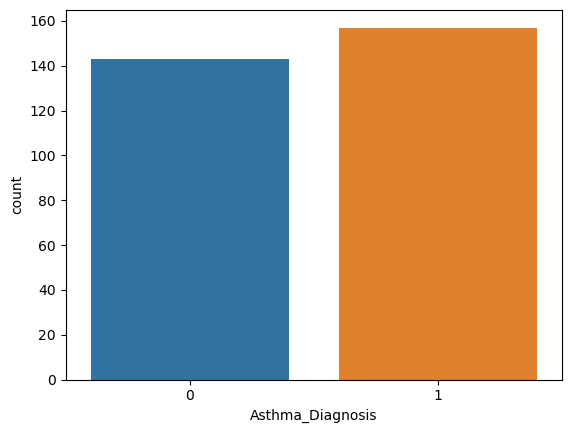

In [79]:
sns.countplot(x="Asthma_Diagnosis", data=df)

## model training

In [82]:
#splitting the dataset into target and features
X = df.drop(columns='Asthma_Diagnosis', axis=1)
Y = df['Asthma_Diagnosis']

In [83]:
#splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [90]:
#logistic regression
model1 = LogisticRegression()


model1.fit(X_train, Y_train)

LogisticRegression()

In [95]:
#knn classifier
model2=KNeighborsClassifier()
model2.fit(X_train, Y_train)

KNeighborsClassifier()

In [98]:
#svm
model3=SVC()
model3.fit(X_train, Y_train)

SVC()

## model Evaluation


In [91]:
X_pred = model1.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5555555555555556


In [93]:
X_pred = model2.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5222222222222223


In [99]:
X_pred = model3.predict(X_test)
accuracy = accuracy_score(X_pred, Y_test)
print("Accuracy of model", accuracy)

Accuracy of model 0.5222222222222223


## predctive system

In [101]:

custom_input = (26,0,2,175)
input = np.asarray(custom_input)
input = input.reshape(1,-1)

pred = model1.predict(input)
print(pred)

[1]


C:\Users\KIIT\anaconda3\mlproject\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [102]:
import pickle
filename="asthma_pred_model.sav"
pickle.dump(model1, open(filename, 'wb'))
